# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("news_api")
type(api_key)

str

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

bitcoin: 6381


{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': "Elon Musk reveals who bitcoin's creator Satoshi Nakamoto might be",
 'description': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency Bitcoin.\xa0"You can watch ideas evolve before Bitcoin was lau…',
 'url': 'https://techncruncher.blogspot.com/2021/12/elon-musk-reveals-who-bitcoins-creator.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEik_48hPzMzsDzwfdUeHj4jNGqYGevEuVjTTPkAGTu9bRN3oePxV6bxF897GK8Az3AaSqUOalYXNG4HSCy0fW5KUHuruCWP8hAfZxgrgbzh-dsbLM9jxyFGCthOZdBCa1dNkqk6mrVl0VtflsV2VvKXfGnwL6-68m-mxp7qHJuLlvqGIahZ9YDe5mt97w=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-12-29T20:41:00Z',
 'content': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expe

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

ethereum: 2819


{'source': {'id': 'business-insider', 'name': 'Business Insider'},
 'author': 'snagarajan@insider.com (Shalini Nagarajan)',
 'title': "Florida has a new crypto-themed restaurant offering 'bitcoinana split,' 'crypto cuban' sandwiches, and 'dogedog' hotdogs that accepts all cryptocurrencies as payment",
 'description': "The new bistro's walls have art depicting bitcoin and ethereum symbols, a rocket headed to the moon, and quotes by dogecoin advocate Elon Musk.",
 'url': 'https://markets.businessinsider.com/news/currencies/crypto-theme-restaurant-florida-cuban-dogecoin-bitcoin-hotdog-crypto-payment-2021-12',
 'urlToImage': 'https://images2.markets.businessinsider.com/61cdaa46cc94ab0019d3042c?format=jpeg',
 'publishedAt': '2021-12-30T14:04:50Z',
 'content': 'Crypto Street Restaurant, Clearwater Beach, Florida.@ClwBeachCrypto/Twitter\r\nA new restaurant in Clearwater Beach, Florida wants more customers to partake in the crypto craze.\r\nCrypto Street Restaura… [+2203 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922
3,2022-01-11,A cryptocurrency CEO has become one of the ric...,0.6369,0.148,0.000,0.852
4,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.06,0.940
1,2022-01-11,Investors interest and growing cryptocurrency ...,0.7579,0.217,0.00,0.783
2,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.00,1.000
3,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.00,1.000
4,2022-01-04,"In early December 2021, Skiff rolled out the o...",0.0000,0.000,0.00,1.000


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.101409,0.059770,0.034410,0.905820
std,0.394272,0.075964,0.059679,0.090547
min,-0.862200,0.000000,0.000000,0.614000
25%,0.000000,0.000000,0.000000,0.855750
50%,0.000000,0.052000,0.000000,0.923000
75%,0.381800,0.090250,0.060250,1.000000
max,0.950600,0.386000,0.266000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.00000
mean,0.201972,0.082470,0.03068,0.88686
std,0.431646,0.091161,0.05011,0.09498
min,-0.802000,0.000000,0.00000,0.62800
25%,0.000000,0.000000,0.00000,0.81375
50%,0.165500,0.071500,0.00000,0.90800
75%,0.558300,0.148500,0.06175,0.97450
max,0.946000,0.372000,0.24600,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin 

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_tokens = []
for x in range (0,100):
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', bitcoin_df["text"][x])
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw = set(stopwords.words("english"))
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    bitcoin_tokens.append(tokens)
    
                         
    
    

In [14]:
bitcoin_df["tokens"] = bitcoin_tokens

In [15]:
bitcoin_df.applymap(lambda x: x[0] if isinstance(x, list) else x)

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923,muskmark
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,denis
2,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922,image
3,2022-01-11,A cryptocurrency CEO has become one of the ric...,0.6369,0.148,0.000,0.852,cryptocurrency
4,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858,dec
...,...,...,...,...,...,...,...
95,2021-12-30,The Zacks Wireless National industry appears t...,-0.7096,0.000,0.204,0.796,zacks
96,2021-12-16,Looking for a holiday present that won’t fall ...,0.0772,0.054,0.045,0.901,looking
97,2021-12-16,NurPhoto/Getty Images\r\nPopular investing app...,0.6908,0.169,0.000,0.831,nurphotogetty
98,2022-01-04,An Apple store.Spencer Platt/Getty Images\r\nW...,0.4588,0.077,0.000,0.923,apple


In [16]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_tokens = []
for x in range (0,100):
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', ethereum_df["text"][x])
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw = set(stopwords.words("english"))
    e_tokens = [word.lower() for word in lem if word.lower() not in sw]
    ethereum_tokens.append(e_tokens)

In [17]:
ethereum_df["tokens"] = ethereum_tokens

In [18]:
ethereum_df.applymap(lambda x: x[0] if isinstance(x, list) else x)

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.060,0.940,crypto
1,2022-01-11,Investors interest and growing cryptocurrency ...,0.7579,0.217,0.000,0.783,investors
2,2021-12-29,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...,0.0000,0.000,0.000,1.000,cryptopunksrokas
3,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.000,1.000,representations
4,2022-01-04,"In early December 2021, Skiff rolled out the o...",0.0000,0.000,0.000,1.000,early
...,...,...,...,...,...,...,...
95,2022-01-08,Web3 has been a very fashionable term this yea...,-0.4588,0.000,0.088,0.912,web
96,2022-01-05,"Over the past few years, you've probably heard...",0.2023,0.075,0.055,0.871,past
97,2022-01-10,What happened\r\nThe crypto market sell-off ha...,-0.4215,0.000,0.088,0.912,happenedthe
98,2022-01-06,Ethereum(CRYPTO:ETH) has had an incredible yea...,0.7178,0.154,0.000,0.846,ethereumcryptoeth


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams


In [20]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
tokens_btc = []
tokens_btc_all = []
for x in range(0,100):
    tokens_btc = bitcoin_df["tokens"].values[x]
    tokens_btc_all.append(tokens_btc)

In [21]:
flattened_btc = [val for sublist in tokens_btc_all for val in sublist]

In [22]:
extra = flattened_btc.pop(22)

In [23]:
flattened_btc.append(extra)

In [24]:
bigram_counts_btc = Counter(ngrams(flattened_btc, n=2))
print(dict(bigram_counts_btc))

{('muskmark', 'ralstonafp'): 2, ('ralstonafp', 'via'): 2, ('via', 'getty'): 4, ('getty', 'imageselon'): 2, ('imageselon', 'musk'): 3, ('musk', 'seems'): 2, ('seems', 'agree'): 2, ('agree', 'many'): 2, ('many', 'hypersecret'): 1, ('hypersecret', 'cryptocurrency'): 1, ('cryptocurrency', 'expert'): 2, ('expert', 'nick'): 2, ('nick', 'szabo'): 2, ('szabo', 'could'): 1, ('could', 'satoshi'): 1, ('satoshi', 'nakamoto'): 2, ('nakamoto', 'mysterious'): 2, ('mysterious', 'creator'): 2, ('creator', 'digital'): 2, ('digital', 'currency'): 7, ('currency', 'char'): 2, ('char', 'rusinovich'): 1, ('rusinovich', 'set'): 1, ('set', 'cryptocurrency'): 1, ('cryptocurrency', 'mining'): 1, ('mining', 'company'): 1, ('company', 'maveric'): 1, ('maveric', 'group'): 1, ('group', 'kazakhstan'): 1, ('kazakhstan', 'thought'): 1, ('thought', 'hit'): 1, ('hit', 'jackpot'): 1, ('jackpot', 'next'): 1, ('next', 'door'): 1, ('door', 'china'): 1, ('china', 'russia'): 1, ('russia', 'country'): 1, ('country', 'everything

In [25]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
tokens_eth = []
tokens_eth_all = []
for x in range(0,100):
    tokens_eth = ethereum_df["tokens"].values[x]
    tokens_eth_all.append(tokens_eth)
flattened_eth = [val for sublist in tokens_eth_all for val in sublist]
bigram_counts = Counter(ngrams(flattened_eth, n=2))
print(dict(bigram_counts))

{('crypto', 'street'): 1, ('street', 'restaurant'): 1, ('restaurant', 'clearwater'): 2, ('clearwater', 'beach'): 2, ('beach', 'floridaclwbeachcryptotwittera'): 1, ('floridaclwbeachcryptotwittera', 'new'): 1, ('new', 'restaurant'): 1, ('beach', 'florida'): 1, ('florida', 'want'): 1, ('want', 'customer'): 1, ('customer', 'partake'): 1, ('partake', 'crypto'): 1, ('crypto', 'crazecrypto'): 1, ('crazecrypto', 'street'): 1, ('street', 'restaura'): 1, ('restaura', 'char'): 1, ('char', 'investors'): 1, ('investors', 'interest'): 1, ('interest', 'growing'): 1, ('growing', 'cryptocurrency'): 1, ('cryptocurrency', 'uptake'): 1, ('uptake', 'helped'): 1, ('helped', 'ethereum'): 1, ('ethereum', 'surge'): 1, ('surge', 'however'): 1, ('however', 'meme'): 1, ('meme', 'stock'): 1, ('stock', 'amc'): 1, ('amc', 'entertainment'): 1, ('entertainment', 'amc'): 1, ('amc', 'gamestop'): 1, ('gamestop', 'gme'): 1, ('gme', 'beat'): 1, ('beat', 'ethereums'): 1, ('ethereums', 'return'): 1, ('return', 'soaring'): 1,

In [26]:
# Function token_count generates the top 10 words for a given coin

"""
def token_count(coin, N=3):
    """Returns the top N tokens from the frequency count"""
    if coin == ("btc", "bitcoin", "BTC", "Bitcoin"):
        bigram_counts = 
    
    print(dict(bigram_counts.most_common(10)))
    return Counter(tokens).most_common(N)
"""

SyntaxError: invalid syntax (<ipython-input-26-16a5a07af558>, line 5)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!


In [ ]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

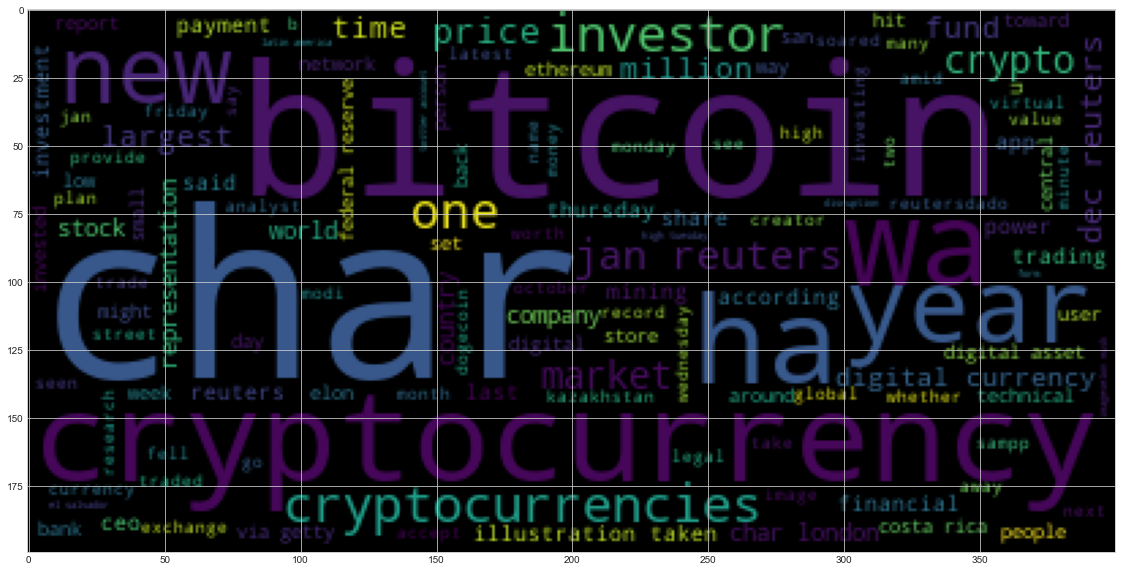

In [29]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)
big_string = ' '.join(flattened_btc)
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

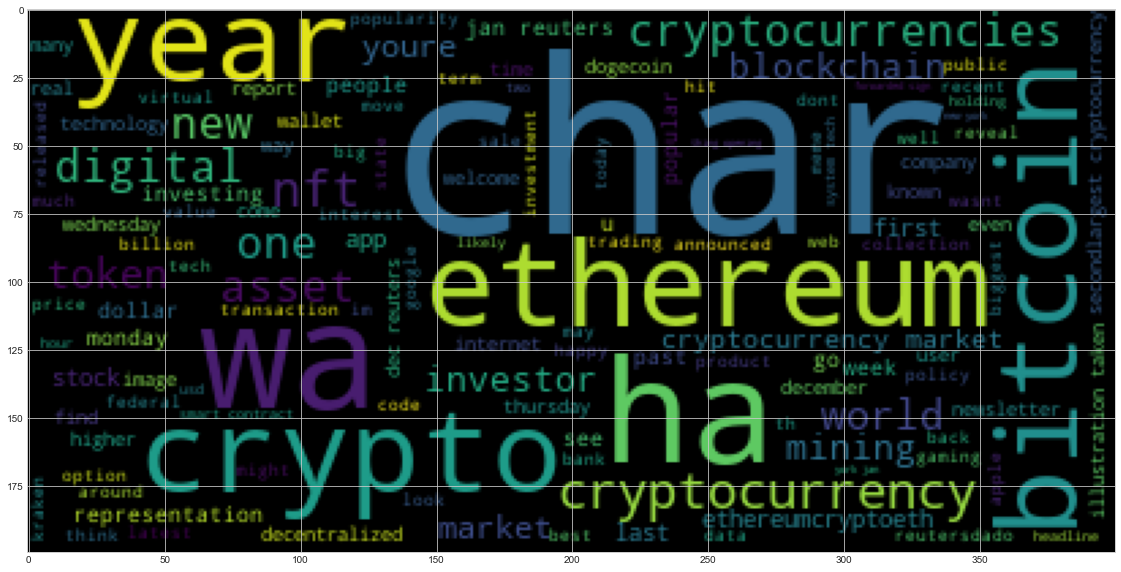

In [30]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(flattened_eth)
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [34]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-01-13 15:05:49.655658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-01-13 15:05:49.655683: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
big_string_btc = ' '.join(bitcoin_df["text"])

In [38]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner_btc = nlp(big_string_btc)
# Add a title to the document
# YOUR CODE HERE!


In [39]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ner_btc, style='ent')

In [40]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in ner_btc.ents if ent.label_ == 'GPE'])

['Kazakhstan', 'China', 'Russia', 'Modi', 'India', 'LONDON', 'UK', 'Federa', 'MEXICO CITY', 'Mexico', 'SAN SALVADOR', "El Salvador's", 'LONDON', 'Abkhazia', 'Zurich', 'Switzerland', 'Clearwater Beach', 'Clearwater Beach', 'Florida', 'LONDON', 'Kazakhstan', 'LONDON', 'HONG KONG', 'SAN SALVADOR', "El Salvador's", 'LONDON', 'NEW YORK', 'Denver', 'Wyoming', 'America', 'El Salvador', 'NEW YORK', 'Germany', 'US', 'Costa Rica', 'Costa Rica', 'Chicago', 'IL', 'Wyoming', 'US', 'Wales', 'Turkey', 'US', 'US', 'U.S.', 'MOSCOW', 'Zawinski', 'US', 'Costa Rica', 'Costa Rica', 'Almaty', 'Kazakhstan', 'Kazakhstan', 'LONDON', 'Turkey']


---

### Ethereum NER

In [41]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
big_string_eth = ' '.join(ethereum_df["text"])

In [42]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner_eth = nlp(big_string_eth)

# Add a title to the document
# YOUR CODE HERE!

In [43]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ner_eth, style='ent')

In [44]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in ner_eth.ents if ent.label_ == 'GPE'])

['Clearwater Beach', 'Clearwater Beach', 'Florida', 'Ethereum', 'MOSCOW', 'Germany', 'HONG KONG', 'Alphabet', 'NEW YORK', 'NEW YORK', 'U.S.', 'China', 'DeFi', 'Federa', 'US', 'LONDON', 'NEW YORK', 'U.S.', 'Ethereu', 'Ill']


---